In [1]:
# Shadeeb Hossain 
#[ORCID ID: 0000-0002-5224-7684]

! pip install flickrapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17300690098649647429
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14410383360
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1708560931664367944
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


**Import Standard Libraries for FlickrAPI**

In [3]:
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
%matplotlib inline

**Accessing FlickrAPI**

In [4]:
# see the flickr demo on where to get keys.
api_key = u'436d70e166305aa50019d30ffbd214d4'   #u'0bcc03asdfasge12412341324041a6d457cb18321'
api_secret = u'4454a5d595e7dd42'  #u'bbeasdfasdf3327a0'
flickr = flickrapi.FlickrAPI(api_key, api_secret)

**Creating Directories for Train and Test**

In [6]:
import warnings
import os
dir_name = 'train'
dir_exists = os.path.isdir(dir_name)
if not dir_exists:
    os.mkdir(dir_name)
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)

dir_name = 'test'
dir_exists = os.path.isdir(dir_name)
if not dir_exists:
    os.mkdir(dir_name)
    print("Making directory %s" % dir_name)
else:
    print("Will store images in directory %s" % dir_name)

dir_folder = os.path.join(os.getcwd(),'train','rotten food')
dir_exists = os.path.isdir(dir_folder)
if not dir_exists:
    os.mkdir(dir_folder)
    print("Making directory %s" % dir_folder)
else:
    print("Will store images in directory %s" % dir_folder)

dir_folder = os.path.join(os.getcwd(),'train','fresh food')
dir_exists = os.path.isdir(dir_folder)
if not dir_exists:
    os.mkdir(dir_folder)
    print("Making directory %s" % dir_folder)
else:
    print("Will store images in directory %s" % dir_folder)

dir_folder = os.path.join(os.getcwd(),'test','rotten food')
dir_exists = os.path.isdir(dir_folder)
if not dir_exists:
    os.mkdir(dir_folder)
    print("Making directory %s" % dir_folder)
else:
    print("Will store images in directory %s" % dir_folder)

dir_folder = os.path.join(os.getcwd(),'test','fresh food')
dir_exists = os.path.isdir(dir_folder)
if not dir_exists:
    os.mkdir(dir_folder)
    print("Making directory %s" % dir_folder)
else:
    print("Will store images in directory %s" % dir_folder)

Will store images in directory train
Will store images in directory test
Will store images in directory /content/train/rotten food
Will store images in directory /content/train/fresh food
Will store images in directory /content/test/rotten food
Will store images in directory /content/test/fresh food


**Downloading *'Rotten Food'* from FlickrAPI for both Training and Testing**


The number of samples are low in the FlickrAPI database and hence the number of samples is reduced to 50

In [8]:
keyword = 'rotten food'
dir_name = 'rotten food'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

nimage = 50
i = 0
nrow = 224
ncol = 224
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):

        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)

        # Read image from file
        im = skimage.io.imread(file)

        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')

        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)

        # Save the image
        if i< 30:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('train',dir_name,keyword, i)
        else:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('test',dir_name,keyword, i)
        skimage.io.imsave(local_name, im2)
        if (i%100) == 1:
          print(local_name)
        i = i + 1
    if (i >= nimage):
        break

train/rotten food/rotten food_0001.jpg


Downloading 'Fresh Food
' from FlickrAPI for both Training and Testing

In [49]:
keyword = 'fresh food'
dir_name = 'fresh food'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100)

nimage = 100
i = 0
nrow = 224
ncol = 224
for photo in photos:
    url=photo.get('url_c')
    if not (url is None):

        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)

        # Read image from file
        im = skimage.io.imread(file)

        # Resize images
        im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')

        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im2 = skimage.img_as_ubyte(im1)

        # Save the image
        if i< 50:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('train',dir_name,keyword, i)
        else:
          local_name = '{0:s}/{1:s}/{2:s}_{3:04d}.jpg'.format('test',dir_name,keyword, i)
        skimage.io.imsave(local_name, im2)
        if (i%100) == 1:
          print(local_name)
        i = i + 1
    if (i >= nimage):
        break

train/fresh food/fresh food_0001.jpg


**Loading a Pre-Trained Xception**

In [14]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

*Clear the Keras session*

In [15]:
from keras import backend as K
K.clear_session()

***Loading the Deep Xception session***

In [31]:
nrow = 150
ncol = 150
input_shape = (nrow, ncol, 3)
from keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.layers import Flatten, Dense
input_shape =(nrow,ncol,3)

base_model = applications.Xception(weights='imagenet', include_top=False,input_shape=input_shape)

***Creating the Sequential model ***

In [23]:

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


**Model summary. It displays the number of trainable parameters vs. the non-trainable parameters.**

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]'


***Using ImageDataGenerator to fetch images on the fly from a directory of images***.

Up to now, the training data has been represented in a large matrix. This is not possible for image data when the datasets are very large. For these applications, the keras package provides a ImageDataGenerator class that can fetch images on the fly from a directory of images. Using multi-threading, training can be performed on one mini-batch while the image reader can read files for the next mini-batch. The code below creates an ImageDataGenerator for the training data. In addition to the reading the files, the ImageDataGenerator creates random deformations of the image to expand the total dataset size. When the training data is limited, using data augmentation is very important.

In [52]:

train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')
test_data_dir = './test'
batch_size = 32
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='binary')

Found 130 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


**Displaying the images**

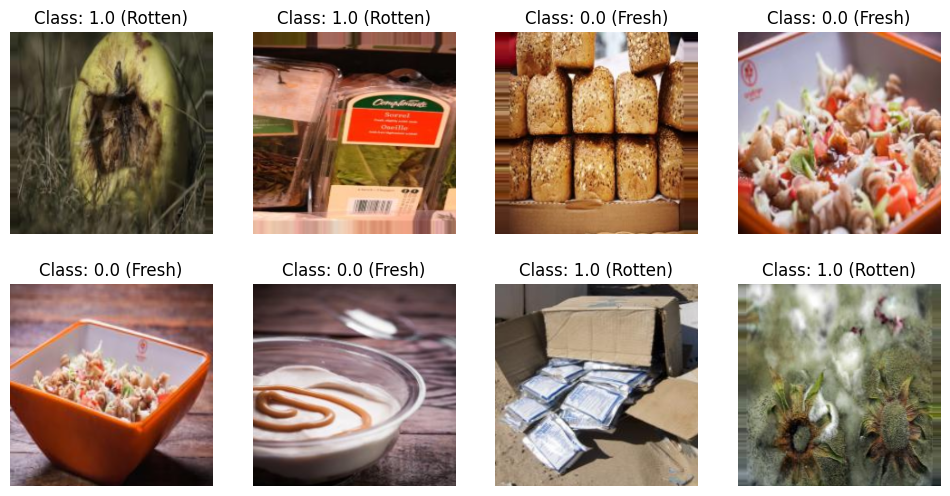

In [54]:
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')
    else:
        # Color image.
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)

    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])
    X, y = train_generator.next()



import matplotlib.pyplot as plt

# Assuming train_generator is your data generator
# Make sure to set the batch_size when creating the generator

# Get a minibatch of data
X_batch, y_batch = train_generator.next()

# Display the first 8 images
num_images_to_display = 8

plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_batch[i])
    plt.title(f'Class: {y_batch[i]} ({"Fresh" if y_batch[i] == 0 else "Rotten"})')
    plt.axis('off')

plt.show()


**Training the model**

In [55]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



In [56]:
# Calculate steps_per_epoch and validation_steps
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size

In [57]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = test_generator.n // batch_size
nepochs = 5  # Number of epochs

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=nepochs,
    validation_data=test_generator,
    validation_steps=validation_steps)


<ipython-input-57-255ac9c0c949>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/5
4/4 [==============================] - 31s 1s/step - loss: 0.6519 - accuracy: 0.6327 - val_loss: 3.3613 - val_accuracy: 0.8906
Epoch 2/5
4/4 [==============================] - 5s 1s/step - loss: 0.2244 - accuracy: 0.9388 - val_loss: 11.0656 - val_accuracy: 0.8438
Epoch 3/5
4/4 [==============================] - 3s 1s/step - loss: 0.1529 - accuracy: 0.9490 - val_loss: 10.5350 - val_accuracy: 0.8594
Epoch 4/5
4/4 [==============================] - 3s 795ms/step - loss: 0.1617 - accuracy: 0.9592 - val_loss: 10.7158 - val_accuracy: 0.8594
Epoch 5/5
4/4 [==============================] - 4s 1s/step - loss: 0.0637 - accuracy: 0.9694 - val_loss: 13.5423 - val_accuracy: 0.8438


Training Accuracy Vs Validation Accuracy

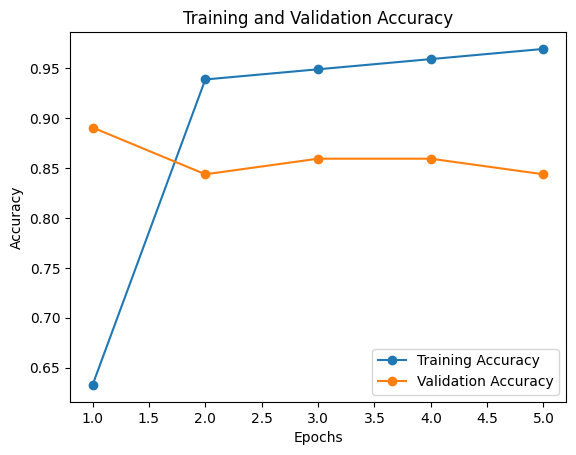

In [58]:
import matplotlib.pyplot as plt

train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Plot the curves
epochs = range(1, nepochs + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
